   SQLITE

Question 1: Read all the data from bc.csv, how many rows is there ? Columns ?

In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/sacha/Downloads/bc.csv")
df
##il y a 569lignes et 33 colonnes

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


2) Insert the bc.csv in the sqlite format.

DB browser

3) In the same db create a new table called tomatch with two variables id_ and rdm_float.

In [6]:
import sqlite3
import pandas as pd


conn = sqlite3.connect("C:/Users/sacha/OneDrive/Documents/No SQL/bc_table.db")
c = conn.cursor()


def create_table_tomatch():
    try:
        c.execute("""CREATE TABLE IF NOT EXISTS tomatch("id" INT PRIMARY KEY, "rdm" FLOAT)""")
        conn.commit()
    except Exception as e:
        print(str(e))
        

create_table_tomatch()

In [3]:
sqlite3.connect("C:/Users/sacha/OneDrive/Documents/No SQL/bc_table.db").close()

4) In the table tomatch insert observations where the id_ starts from 50k, ends at 10000000 and is only even numbers. rdm_float is a random float for each observation.

In [7]:
import tqdm
import random as rd

query = """INSERT INTO tomatch("id", "rdm") VALUES (?, ?)"""

list_of_insertion = []
for i in tqdm.tqdm(range(50000,10000000,2)):
    values = (i,rd.random())
    list_of_insertion.append(values)
    if len(list_of_insertion) == 10000:
        c.executemany(query, list_of_insertion)
        list_of_insertion = []
conn.commit()

100%|██████████| 4975000/4975000 [00:18<00:00, 264134.67it/s]


5) Do an Inner join between the two tables and compute the different aggregate functions on a column of your choice.

In [2]:
import sqlite3

conn = sqlite3.connect('C:/Users/sacha/OneDrive/Documents/No SQL/bc_table.db')
c = conn.cursor()

c.execute("""SELECT AVG(bc.radius_mean), COUNT(bc.radius_mean), MAX(bc.radius_mean), MIN(bc.radius_mean)
             FROM bc
             INNER JOIN tomatch ON bc.id = tomatch.id""")

docs = c.fetchall()
print(docs)

[(14.010595041322313, 484, 28.11, 6.981)]


6) How many observations have a radius_mean greater than 15 ? From them how many have a texture_mean greater than 20 ?

In [3]:
c.execute( """SELECT COUNT(*) FROM bc WHERE radius_mean > 15 AND texture_mean > 20 """)
docs=c.fetchall()
print(docs)

[(106,)]


7) For each category in diagnosis do the mean of a variable named radius_mean and round it to get only 2 numbers after the comma. Compute the difference between the mean of both groups

In [53]:
c.execute("""
    SELECT 
        diagnosis,
        ROUND(AVG(concavity_worst), 2) AS mean_concavity_stats,
        (SELECT ROUND(AVG(concavity_worst), 2) FROM bc WHERE diagnosis = 'M') -
        (SELECT ROUND(AVG(concavity_worst), 2) FROM bc WHERE diagnosis = 'B') AS mean_difference
    FROM 
        bc
    GROUP BY 
        diagnosis
""")
docs=c.fetchall()
print(docs)

[('B', 0.17, 0.28), ('M', 0.45, 0.28)]


8) Change the name of the column "diagnosis" to "label"

In [54]:
query = """
ALTER TABLE bc
RENAME COLUMN diagnosis TO label
"""
c.execute(query)
conn.commit()

9) Add a column named "day" of type DATE.

In [ ]:
query = """
ALTER TABLE bc
ADD COLUMN day DATE
"""
c.execute(query)
conn.commit()

10) Change the type of the column "area_mean" to int (hint, not possible on sqlite, create a new column)

In [ ]:
c.execute("""
ALTER TABLE bc
ADD COLUMN area_mean_num INTEGER
""")
query_update= """
UPDATE bc
SET area_mean_num = CAST(area_mean AS INTEGER)
"""
c.execute(query_update)

query_drop_column = """
ALTER TABLE bc
DROP COLUMN area_mean
"""

c.execute("""
ALTER TABLE bc
DROP COLUMN area_mean
""")


c.execute("""
ALTER TABLE bc
RENAME COLUMN area_mean_num TO area_mean
""")
conn.commit()

11) create a new table called tomatch2 exactly the same way as tomatch except you increment id_ by 10.

In [8]:
import sqlite3
import pandas as pd


conn = sqlite3.connect("C:/Users/sacha/OneDrive/Documents/No SQL/bc_table.db")
c = conn.cursor()


def create_table_tomatch2():
    try:
        c.execute("""CREATE TABLE IF NOT EXISTS tomatch2("id" INT PRIMARY KEY, "rdm" FLOAT)""")
        conn.commit()
    except Exception as e:
        print(str(e))
        

create_table_tomatch2()

import tqdm
import random as rd

query = """INSERT INTO tomatch2("id", "rdm") VALUES (?, ?)"""

list_of_insertion = []
for i in tqdm.tqdm(range(50000,10000000,10)):
    values = (i,rd.random())
    list_of_insertion.append(values)
    if len(list_of_insertion) == 10000:
        c.executemany(query, list_of_insertion)
        list_of_insertion = []
conn.commit()

100%|██████████| 995000/995000 [00:03<00:00, 254250.17it/s]


12) Do an inner join of bc, tomatch and tomatch2 where the radius_mean is greater than 15, and the rdm_float is greater than 0.50 in tomatch AND tomatch2.

In [11]:
c = conn.cursor()
c.execute("""SELECT *
FROM bc
INNER JOIN tomatch ON bc.id = tomatch.id
INNER JOIN tomatch2 ON bc.id = tomatch2.id
WHERE bc.radius_mean > 15
  AND tomatch.rdm > 0.50
  AND tomatch2.rdm > 0.50""")
result=c.fetchall()
conn.commit()

In [12]:
sqlite3.connect('C:/Users/sacha/OneDrive/Documents/No SQL/bc_table.db-journal').close()

     My  SQL exercice

In [13]:
import pandas as pd
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root",
  database="m1_ds2e"
)

c = mydb.cursor()

c.execute("SELECT * FROM sample_superstore")

docs = c.fetchall()

columns = [description[0] for description in c.description]
df = pd.DataFrame(docs, columns=columns)
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,5/28/2012,5/30/2012,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,7/7/2010,7/8/2010,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,7/27/2011,7/28/2011,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,7/27/2011,7/28/2011,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,7/27/2011,7/27/2011,998.2023,8,1446.67,88523


1: How many orders were placed in total?

In [9]:
c = mydb.cursor()
c.execute("""SELECT COUNT( "Order ID") AS total_commandes
FROM sample_superstore""");
result=c.fetchall()
print(result)

[(175,)]


2: What is the total sales amount?

In [14]:
c.execute("""SELECT SUM(sales) AS total_sales FROM sample_superstore""")
result = c.fetchall()
print(result)

[(130555.31000000006,)]


3: What is the average profit per order?

In [16]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="m1_ds2e"
)

c = mydb.cursor()
c.execute("""SELECT `Order ID` , AVG(Profit) AS avg_profit
FROM m1_ds2e.sample_superstore
GROUP BY `Order ID`""")

docs = c.fetchall()
print(docs)

[(88525, 1.32), (88522, 4.56), (88523, 306.6841), (88524, 1388.0523), (88526, 1001.4453), (90193, 4390.3665), (90197, -141.26), (90194, 1045.4673), (90200, 406.7419), (90198, 72.9928), (90199, -252.67759875000002), (90195, 142.7955), (90192, -53.8096), (90196, 23.12), (86838, 185.425125), (86845, -44.54), (86837, -59.82), (86839, 261.8757), (86840, -1.17), (86841, -24.03), (86842, 23.2668), (86843, -174.2696), (86836, 327.68155), (86844, 3.4595), (90033, -6.82), (90034, -96.33), (90031, 314.4813), (90035, 164.48680000000002), (90038, -17.49), (90039, 139.54835), (90032, -114.6399), (90036, -491.73199999999997), (90037, -41.82), (41793, 384.38), (42949, -66.06495), (55269, -41.82), (9895, -6.82), (17860, -96.33), (26887, 172.27274999999997), (50533, -491.73199999999997), (18596, 174.845), (87655, 571.89495), (87660, 83.24), (87669, 353.77216), (87651, -16.802), (87656, 1489.8411), (87662, -23.415), (87663, -88.102), (87657, -10.58), (87666, 677.50343), (87658, 420.984), (87667, 19.4097)

4: Which customer has placed the most orders?

In [25]:
import mysql.connector
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="m1_ds2e"
)
c = mydb.cursor()
# Exécution de la requête SQL pour trouver le client avec le plus de commandes
c.execute("""
    SELECT `Customer Name` , sum(`Quantity ordered new`) AS Quantity_ordered
FROM sample_superstore
GROUP BY `Customer Name` order by Quantity_ordered desc;
""")

# Récupération du résultat
most_orders_customer = c.fetchone()

# Affichage du résultat
print("Client ayant passé le plus de commandes: {} ({} commandes)".format(most_orders_customer[0], most_orders_customer[1]))



Client ayant passé le plus de commandes: Tony Wilkins Winters (533 commandes)


5: What is the total profit for each product category?

In [24]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="m1_ds2e"
)

c = mydb.cursor()
c.execute("""SELECT `Product Category` , sum(Profit) AS profit_total
FROM sample_superstore
GROUP BY `Product Category`;""")

docs = c.fetchall()
print(docs)

[('Office Supplies', 11605.983540000001), ('Technology', 10225.340091999999), ('Furniture', 1976.0725965000036)]



6: What is the average discount percentage?



In [23]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="m1_ds2e"
)

c = mydb.cursor()
c.execute("""SELECT AVG(Discount) AS avg_discount
FROM m1_ds2e.sample_superstore;""")

avg_discount = c.fetchone()[0]

# Affichage du résultat en pourcentage
print("La moyenne de la colonne Discount est :", avg_discount * 100)

La moyenne de la colonne Discount est : 4.96571428571428


7: Which region has the highest total sales?

In [26]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="m1_ds2e"
)

c = mydb.cursor()
c.execute("""SELECT `Region` , SUM(Sales) AS total_sales_byregion
FROM sample_superstore
GROUP BY `Region` order by total_sales_byregion desc;""")

docs = c.fetchall()
print(docs)

[('West', 75678.49999999999), ('East', 38033.84999999999), ('Central', 14261.619999999999), ('South', 2581.34)]


8: How many orders were shipped using each shipping mode?

In [27]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="m1_ds2e"
)

c = mydb.cursor()
c.execute("""SELECT `Ship Mode` , COUNT(`Order ID`) 
FROM sample_superstore
GROUP BY `Ship Mode`""")

docs = c.fetchall()
print(docs)

[('Regular Air', 131), ('Express Air', 23), ('Delivery Truck', 21)]


9: What is the total quantity ordered for each product sub-category?

In [28]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="m1_ds2e"
)

c = mydb.cursor()
c.execute("""SELECT `Product Sub-Category` , SUM(`Quantity ordered new`) AS quantite_commandee
FROM sample_superstore
GROUP BY `Product Sub-Category` """)

docs = c.fetchall()
print(docs)

[('Labels', Decimal('171')), ('Pens & Art Supplies', Decimal('196')), ('Paper', Decimal('286')), ('Scissors, Rulers and Trimmers', Decimal('24')), ('Telephones and Communication', Decimal('252')), ('Office Machines', Decimal('123')), ('Chairs & Chairmats', Decimal('166')), ('Appliances', Decimal('184')), ('Bookcases', Decimal('39')), ('Tables', Decimal('50')), ('Envelopes', Decimal('46')), ('Office Furnishings', Decimal('233')), ('Rubber Bands', Decimal('119')), ('Binders and Binder Accessories', Decimal('129')), ('Storage & Organization', Decimal('121')), ('Copiers and Fax', Decimal('5')), ('Computer Peripherals', Decimal('69'))]


10: Which product has the highest profit margin?

In [37]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="m1_ds2e"
)

c = mydb.cursor()
c.execute("""SELECT `Product Name` ,(SUM(Profit) / SUM(Sales)) AS profit_margin
FROM sample_superstore
GROUP BY `Product Name` order by profit_margin desc limit 1""")

docs = c.fetchall()
print(docs)

[('Canon S750 Color Inkjet Printer', 0.6900000000000001)]


11: What is the total sales amount for each year?

In [38]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="m1_ds2e"
)

c = mydb.cursor()
c.execute("""SELECT SUBSTRING(`Order Date`, -4) AS annee, SUM(Sales) AS total_sales_amount
FROM  sample_superstore
GROUP BY annee order by total_sales_amount desc""")

docs = c.fetchall()
print(docs)

[('2013', 48236.200000000004), ('2012', 44893.209999999985), ('2010', 25377.779999999995), ('2011', 12048.119999999997)]


12: Which customer segment has the highest average sales?

In [40]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="m1_ds2e"
)

c = mydb.cursor()
c.execute("""SELECT `Customer segment` ,avg(sales) AS avg_sales
FROM sample_superstore
GROUP BY `Customer segment` order by avg_sales desc limit 1""")

docs = c.fetchall()
print(docs)

[('Small Business', 1041.5648076923078)]


                                   PostgreSQL EXERCICES 

In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/sacha/Downloads/bank_full.csv")
df.columns

Index(['age', 'job', 'marital', 'education', 'default_', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [42]:
!pip install psycopg2

  Obtaining dependency information for psycopg2 from https://files.pythonhosted.org/packages/37/2c/5133dd3183a3bd82371569f0dd783e6927672de7e671b278ce248810b7f7/psycopg2-2.9.9-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 487.6 kB/s eta 0:00:03
   ---- ----------------------------------- 0.1/1.2 MB 1.2 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 6.7 MB/s eta 0:00:00


In [4]:
import psycopg2

# Connect to PostgreSQL database
conn = psycopg2.connect(dbname="new_db", user="postgres", password="root", host="localhost",  port="5432" )

In [ ]:
# Create a cursor object
cur = conn.cursor()

# Define the table schema
table_name = "bank_full"
columns = [
    "age INTEGER",
    "job VARCHAR(100)",
    "marital VARCHAR(20)",
    "education VARCHAR(100)",
    "default_ VARCHAR(10)",
    "balance NUMERIC",
    "housing VARCHAR(10)",
    "loan VARCHAR(10)",
    "contact VARCHAR(100)",
    "day INTEGER",
    "month VARCHAR(20)",
    "duration INTEGER",
    "campaign INTEGER",
    "pdays INTEGER",
    "previous INTEGER",
    "poutcome VARCHAR(100)",
    "y VARCHAR(10)"
]

# Construct the CREATE TABLE query
create_table_query = (
    "CREATE TABLE IF NOT EXISTS " + table_name + " (" +
    ", ".join(columns) +
    ")"
)

# Execute the CREATE TABLE query
cur.execute(create_table_query)

# Commit the transaction
conn.commit()

# Execute the CREATE TABLE query
cur.execute(create_table_query)

# Commit the transaction
conn.commit()

# Close cursor and connection
cur.close()
conn.close()

In [47]:
conn.close()

1: What is the average age of the customers?

In [16]:
import psycopg2

# Connect to PostgreSQL database
conn = psycopg2.connect(dbname="new_db", user="postgres", password="root", host="localhost",  port="5432" )

# Create a cursor object
cur = conn.cursor()
cur.execute("""select AVG(age) from bank_full""")
# Fetch the result
average_age = cur.fetchone()[0]

    # Print the average age
print("Average age of customers:", average_age)

    # Commit the transaction
conn.commit()


Average age of customers: 40.9362102143283714


2: How many customers have defaulted on loans?

In [17]:
cur.execute("SELECT COUNT(*) FROM bank_full WHERE default_ = 'yes'")
cur.fetchone()

(815,)

3: What is the maximum balance in the account?

In [23]:
cur.execute("SELECT MAX(balance) FROM bank_full")
cur.fetchone()

(Decimal('102127'),)

4: How many customers have a housing loan?

In [22]:
cur.execute("SELECT COUNT(*) FROM bank_full WHERE housing = 'yes'")
cur.fetchone()

(25130,)

5: What is the education level of the youngest customer?

In [26]:
cur.execute("""SELECT age AS min_age, education 
FROM bank_full 
WHERE age = (SELECT MIN(age) FROM bank_full);
""")

# Fetch the result
cur.fetchall()


[(18, 'primary'),
 (18, 'unknown'),
 (18, 'primary'),
 (18, 'unknown'),
 (18, 'secondary'),
 (18, 'unknown'),
 (18, 'unknown'),
 (18, 'secondary'),
 (18, 'primary'),
 (18, 'unknown'),
 (18, 'unknown'),
 (18, 'unknown')]

6: What is the marital status of the oldest customer?

In [27]:
cur.execute("SELECT marital FROM bank_full WHERE age = (SELECT max(age) FROM bank_full)")

# Fetch the result
cur.fetchall()

[('divorced',), ('married',)]

In [28]:
cur.execute("""SELECT age AS max_age, marital
FROM bank_full 
WHERE age = (SELECT MAX(age) FROM bank_full);
""")

# Fetch the result
cur.fetchall()

[(95, 'divorced'), (95, 'married')]

7: What is the distribution of the months in which customers were last contacted?

In [29]:
cur.execute("SELECT month, COUNT(*) FROM bank_full GROUP BY month ORDER BY month")

 # Fetch all rows
rows = cur.fetchall()

    # Print the results
print("Distribution of months in which customers were last contacted:")
for row in rows:
    print("Month:", row[0], "Count:", row[1])

    # Commit the transaction
conn.commit()


Distribution of months in which customers were last contacted:
Month: apr Count: 2932
Month: aug Count: 6247
Month: dec Count: 214
Month: feb Count: 2649
Month: jan Count: 1403
Month: jul Count: 6895
Month: jun Count: 5341
Month: mar Count: 477
Month: may Count: 13766
Month: nov Count: 3970
Month: oct Count: 738
Month: sep Count: 579


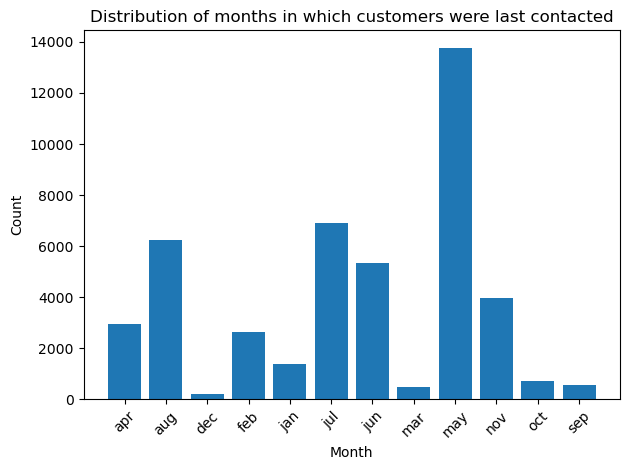

In [30]:
import psycopg2
import matplotlib.pyplot as plt

cur.execute("SELECT month, COUNT(*) FROM bank_full GROUP BY month ORDER BY month")

# Fetch all rows
rows = cur.fetchall()

# Extract months and counts
months = [row[0] for row in rows]
counts = [row[1] for row in rows]

# Plot histogram
plt.bar(months, counts)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of months in which customers were last contacted')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


8: What is the average duration of contact for customers who have a personal loan?

In [32]:
cur.execute("""select AVG(duration) from bank_full where loan='yes'""")
cur.fetchone()

(Decimal('250.8453892876863611'),)

9: How many customers were previously contacted, and what was the average duration of their last contact?

In [34]:
cur.execute("""
        SELECT AVG(duration) AS average_duration
        FROM bank_full
        WHERE pdays != -1
    """)

average_duration = cur.fetchone()[0]

print("Average duration of last contact for previously contacted customers:", average_duration)


Average duration of last contact for previously contacted customers: 260.1186871745185903


10: What is the distribution of job types among customers?

In [35]:
cur.execute("""
        SELECT job, COUNT(*) AS count
        FROM bank_full
        GROUP BY job
        ORDER BY count DESC
    """)

rows = cur.fetchall()

print("Distribution of job types among customers:")
for row in rows:
    print("Job:", row[0], "Count:", row[1])

conn.commit()


Distribution of job types among customers:
Job: blue-collar Count: 9732
Job: management Count: 9458
Job: technician Count: 7597
Job: admin. Count: 5171
Job: services Count: 4154
Job: retired Count: 2264
Job: self-employed Count: 1579
Job: entrepreneur Count: 1487
Job: unemployed Count: 1303
Job: housemaid Count: 1240
Job: student Count: 938
Job: unknown Count: 288


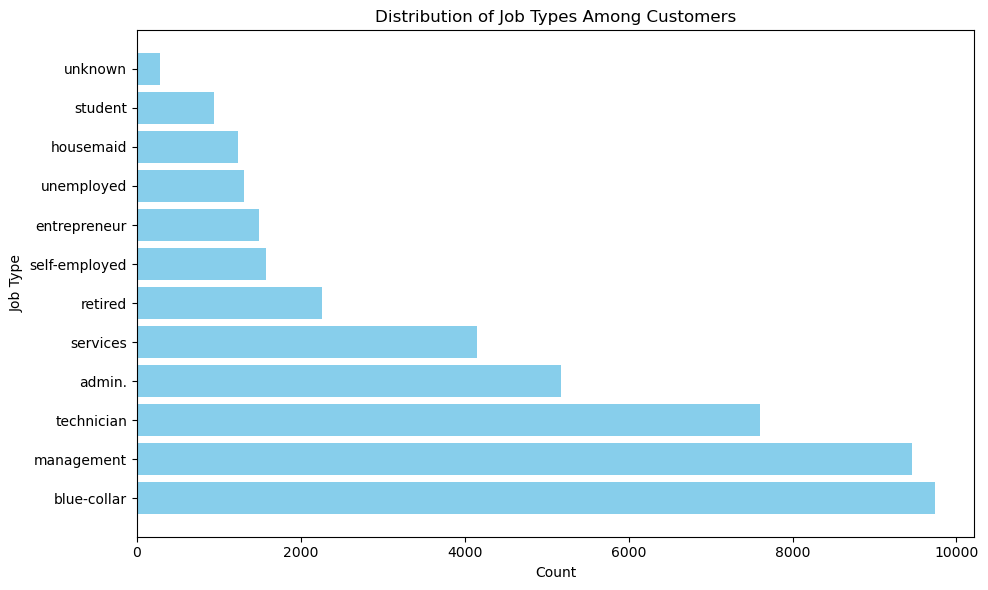

In [41]:
 # Extract job types and counts
jobs = [row[0] for row in rows]
counts = [row[1] for row in rows]

    # Plot horizontal histogram
plt.figure(figsize=(10, 6))
plt.barh(jobs, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.title('Distribution of Job Types Among Customers')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

    # Commit the transaction
conn.commit()



11: How many customers have been contacted more than once in the current campaign?

In [49]:
# Connect to PostgreSQL database
conn = psycopg2.connect(dbname="new_db", user="postgres", password="root", host="localhost",  port="5432" )

# Create a cursor object
cur = conn.cursor()

cur.execute("""select count(*) campaign from bank_full where campaign >=1""")
cur.fetchone()

(45211,)

12: What is the success rate of previous marketing campaigns (poutcome) among customers

In [42]:
cur.execute("""
        SELECT COUNT(*) AS success_count
        FROM bank_full
        WHERE poutcome = 'success'
    """)

    # Fetch the result
success_count = cur.fetchone()[0]
cur.execute("""
        SELECT COUNT(*) AS total_count
        FROM bank_full
        WHERE poutcome IS NOT NULL
    """)
total_count = cur.fetchone()[0]

success_rate = (success_count / total_count) * 100    

In [43]:
print("Success rate of previous marketing campaigns among customers:", success_rate, "%")


Success rate of previous marketing campaigns among customers: 3.34210700935613 %
